## REMOTE GRAPH: LangGraph Platform


In [ ]:
from langgraph.pregel.remote import RemoteGraph
from langgraph_sdk import get_sync_client
from langgraph.types import Command

url = "http://127.0.0.1:8000"
graph_name = "main_graph"
sync_client = get_sync_client(url=url)
remote_graph = RemoteGraph(graph_name, url=url)

# create a thread (or use an existing thread instead)
thread = sync_client.threads.create()

# obtain the graph with the thread config
config = {"configurable": {"thread_id": thread["thread_id"]}}

In [ ]:
# Define the input and invoke
user_input = "Ey, puedes resumirme 10 mensajes?"
message_input = {"messages": [{"role": "human", "content": user_input}]}
for event in remote_graph.stream(message_input, config, stream_mode="updates"):
    print(event)
    print("\n")


In [ ]:
# Continue the action
for event in remote_graph.stream(
    # provide continue
    Command(resume={"action": "continue"}),
    config,
    stream_mode="updates",
):
    print(event)
    print("\n")

## LOCAL AGENTS SERVERLESS

#### OAKLANG

In [ ]:
from langgraph.checkpoint.memory import MemorySaver
from frank.workflow_builder import WorkflowBuilder
from frank.config.layouts.simple_oak_config_graph import SimpleOakConfigGraph
from frank.entity.models.stategraph import SharedState
from frank.utils.common import read_yaml
from frank.utils.logger import setup_logging
from frank.constants import *

## Read the config.yaml
config = read_yaml(CONFIG_FILE_PATH)

## Setup logging Configuration
setup_logging(config)

## Workflow Configuration for the main graph
workflow_builder = WorkflowBuilder(
    config=SimpleOakConfigGraph, 
    state_schema=SharedState, 
    checkpointer=MemorySaver(),
)
graph = workflow_builder.compile() # compile the graph
workflow_builder.display_graph(save=True, filepath="artifacts/graph.png") # update the graph artifact

In [ ]:
# Define the RunnableConfig
config = {"configurable": {"thread_id": "001"}}

In [ ]:
# Define the input
user_input = "What is the evolution of feebas?; and could you give me random movements of the evolution?"
message_input = {"messages": [{"role": "human", "content": user_input}]}

# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

#### HUMAN IN THE LOOP 

https://langchain-ai.github.io/langgraph/how-tos/human_in_the_loop/review-tool-calls/ 

In [1]:
from langgraph.checkpoint.memory import MemorySaver
from frank.workflow_builder import WorkflowBuilder
from frank.config.layouts.oak_human_loop_config_graph import OakHumanLoopConfigGraph
from frank.entity.models.stategraph import SharedState
from frank.utils.common import read_yaml
from frank.utils.logger import setup_logging
from frank.constants import *

## Read the config.yaml
config = read_yaml(CONFIG_FILE_PATH)

## Setup logging Configuration
setup_logging(config)

## Workflow Configuration for the main graph
workflow_builder = WorkflowBuilder(
    config=OakHumanLoopConfigGraph, 
    state_schema=SharedState, 
    checkpointer=MemorySaver(),
)
graph = workflow_builder.compile() # compile the graph
# workflow_builder.display_graph(save=True, filepath="artifacts/human_graph.png") # update the graph artifact

2025-04-15 19:54:12 - graph_layout - INFO - GraphLayout initialized
2025-04-15 19:54:12 - edge_manager - INFO - EdgeManager initialized
2025-04-15 19:54:12 - node_manager - INFO - NodeManager initialized
2025-04-15 19:54:12 - workflow_builder - INFO - WorkFlowBuilder initialized


In [2]:
from langgraph.types import Command

# Define the RunnableConfig
config = {"configurable": {"thread_id": "001"}}

In [ ]:
# DEMO 1
# Define the input
user_input = "Hi!"
message_input = {"messages": [{"role": "human", "content": user_input}]}

# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

In [ ]:
# Define the input
user_input = "Could you give me random movements of pickachu, and what is his evolutions?"
message_input = {"messages": [{"role": "human", "content": user_input}]}

# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

In [ ]:
# Define the input
user_input = "I would like to capture all the pokemon of Ireland"
message_input = {"messages": [{"role": "human", "content": user_input}]}

# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

In [ ]:
message_input = Command(resume={"action": "feedback", 
                                "data": "Sorry, I just want to capture all the pokemon of Iceland... NOT IRELAND"})
# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

In [ ]:
message_input = Command(resume={"action": "continue"})
# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

In [ ]:
# TODO: fix manage two calls in the same stage
### DEMO 2
# Define the input
user_input = "I would like to capture all the pokemon of Ireland. By the way... What is the latest evolution of Pikachu?"
message_input = {"messages": [{"role": "human", "content": user_input}]}

# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

In [ ]:
message_input = Command(resume={"action": "feedback", 
                                "data": "Sorry, I just want to capture all the pokemon of Iceland... NOT IRELAND"})
# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

In [ ]:
message_input = Command(resume={"action": "continue"})
# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

#### TEST DEFAULT

In [ ]:
from typing import Any, Union
from pydantic import BaseModel
from langchain_core.messages import AnyMessage


from typing_extensions import TypedDict, Literal
from langgraph.graph import StateGraph, START, END, MessagesState
from langgraph.checkpoint.memory import MemorySaver
from langgraph.types import Command, interrupt
from langchain_core.tools import tool
from langchain_core.messages import AIMessage
from IPython.display import Image, display
from services.llm import LLMServices
from langgraph.prebuilt import ToolNode
from frank.components.tools.get_evolution_tool import GetEvolutionTool
import requests


@tool
def weather_search(city: str):
    """Search for the weather"""
    print("----")
    print(f"Searching for: {city}")
    print("----")
    if city == 'New York':
        return "Sunny!"
    else:
        return "Cloudy"

# tools=[weather_search]
tools=[GetEvolutionTool()]


model = LLMServices.model.bind_tools(
    tools
)


class State(MessagesState):
    """Simple state."""



async def call_llm(state: Union[list[AnyMessage], dict[str, Any], BaseModel]) -> dict[str, list]:
    messages = state["messages"]
    response = await model.ainvoke(messages)
    # We return a list, because this will get added to the existing list
    print(f"Printing Model State: {state}")
    return {"messages": [response]}


def human_review_node(state) -> Command[Literal["call_llm", "run_tool"]]:
    last_message = state["messages"][-1]
    tool_call = last_message.tool_calls[-1]


    # if len(state["messages"]) > 1:
    #     prenultimate_message = state["messages"][-1]
    print(f"HUMAN REVIEW NODE MESSAGES: {state["messages"]}")

    # if type(state["messages"][-2]) == AIMessage:
    #     recent_message = state["messages"][-2]
    #     another_tool_call= recent_message.tools_calls[-2]


    # this is the value we'll be providing via Command(resume=<human_review>)
    human_review = interrupt(
        {
            "question": "Is this correct?",
            # Surface tool calls for review
            "tool_call": tool_call,
        }
    )

    review_action = human_review["action"]
    review_data = human_review.get("data")

    # if approved, call the tool
    if review_action == "continue":
        return Command(goto="run_tool")

    # update the AI message AND call tools
    elif review_action == "update":
        updated_message = {
            "role": "ai",
            "content": last_message.content,
            "tool_calls": [
                {
                    "id": tool_call["id"],
                    "name": tool_call["name"],
                    # This the update provided by the human
                    "args": review_data,
                }
            ],
            # This is important - this needs to be the same as the message you replacing!
            # Otherwise, it will show up as a separate message
            "id": last_message.id,
        }
        return Command(goto="run_tool", update={"messages": [updated_message]})

    # provide feedback to LLM
    elif review_action == "feedback":
        # NOTE: we're adding feedback message as a ToolMessage
        # to preserve the correct order in the message history
        # (AI messages with tool calls need to be followed by tool call messages)
        tool_message = {
            "role": "tool",
            # This is our natural language feedback
            "content": review_data,
            "name": tool_call["name"],
            "tool_call_id": tool_call["id"],
        }
        return Command(goto="call_llm", update={"messages": [tool_message]})




def route_after_llm(state) -> Literal["end", "review"]:
    if len(state["messages"][-1].tool_calls) == 0:
        return "end"
    else:
        return "review"


builder = StateGraph(State)
builder.add_node(call_llm)

builder.add_node(ToolNode(tools=tools,
         name="run_tool"))

builder.add_node(human_review_node)
builder.add_edge(START, "call_llm")


builder.add_conditional_edges(source="call_llm", 
                              path=route_after_llm,
                              path_map={
                                  "end": END, # If last call `tools`, then end.
                                  "review": "human_review_node", # Human review in the loop.
                                  }
)

builder.add_edge("run_tool", "call_llm")

# Set up memory
memory = MemorySaver()

# Add
graph = builder.compile(checkpointer=memory)

# View
# display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
from langgraph.types import Command

# Define the RunnableConfig
config = {"configurable": {"thread_id": "001"}}

In [ ]:
# Define the input
user_input = "Could you give the evolution of Feebas?"
message_input = {"messages": [{"role": "human", "content": user_input}]}

# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

In [ ]:
message_input = Command(resume={"action": "feedback", 
                                "data": "Sorry, I just wanted to know the evolution of Pikachu"})

# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

In [ ]:
message_input = Command(resume={"action": "update", 
                                "data": {"pokemon_name": "pikachu"}})

# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

In [ ]:
message_input = Command(resume={"action": "continue"})
# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

In [ ]:
############# WHEATHER SEARCH

In [ ]:
# Define the input
user_input = "Could you give the whether of LA?"
message_input = {"messages": [{"role": "human", "content": user_input}]}

# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

In [ ]:
message_input = Command(resume={"action": "feedback", 
                                "data": "Sorry, I mean of New York"})

# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

In [ ]:
message_input = Command(resume={"action": "update", 
                                "data": {"city": "New York"}})

# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

In [ ]:
message_input = Command(resume={"action": "continue"})
# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

#### AUTOGEN CORE + OAKLANG

https://microsoft.github.io/autogen/stable/user-guide/core-user-guide/framework/distributed-agent-runtime.html

https://microsoft.github.io/autogen/stable/user-guide/core-user-guide/core-concepts/architecture.html

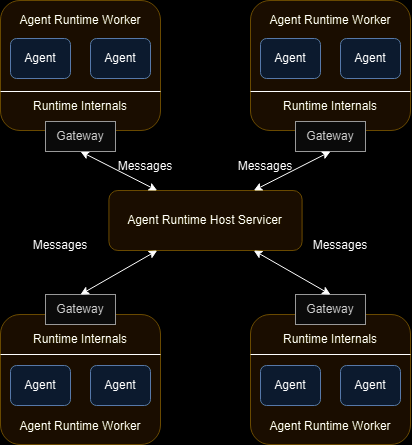

A distributed runtime, as shown in the diagram above, consists of a host servicer and multiple workers. The host servicer facilitates communication between agents across workers and maintains the states of connections. The workers run agents and communicate with the host servicer via gateways. They advertise to the host servicer the agents they run and manage the agents’ lifecycles.

Agents work the same way as in the standalone runtime so that developers can switch between the two runtime types with no change to their agent implementation.

In [ ]:
#### AUTOGEN WRAPPER

from dataclasses import dataclass

from autogen_core import AgentId, MessageContext, RoutedAgent, SingleThreadedAgentRuntime, message_handler
from langgraph.graph.state import CompiledStateGraph

@dataclass
class Message:
    content: str

class LangGraphToolUseAgent(RoutedAgent):
    def __init__(self, description: str, graph: CompiledStateGraph) -> None:  # pyright: ignore
        super().__init__(description)

        # Use the graph builder compiled
        self._app = graph

    @message_handler
    async def handle_user_message(self, message: Message, ctx: MessageContext) -> Message:
        # Use the Runnable
        final_state = await self._app.ainvoke(
            {
                "messages": [{"role": "human", 
                              "content": message.content}]
            },
            config=config, # RunnableConfig here
        )
        response = Message(content=final_state["messages"][-1].content)
        return response


runtime = SingleThreadedAgentRuntime()
await LangGraphToolUseAgent.register(
    runtime,
    "oaklang_langgraph",
    lambda: LangGraphToolUseAgent(
        description="Tool use agent",
        graph=graph,
    ),
)
agent = AgentId("oaklang_langgraph", key="default")

In [ ]:
runtime.start()
response = await runtime.send_message(Message("What is the evolution of feebas?; and could you give me random movements of the evolution?"), agent)
print(response.content)
await runtime.stop()

#### AUTOGEN + OAKLANG + HUMAN IN THE LOOP

In [ ]:
from dataclasses import dataclass
from autogen_core import AgentId, MessageContext, RoutedAgent, SingleThreadedAgentRuntime, message_handler
from langgraph.graph.state import CompiledStateGraph
from typing import Union
from pydantic import BaseModel, ConfigDict
from langgraph.types import Command  

@dataclass
class Message:
    content: str

@dataclass
class WrapperCommand(BaseModel):
    command: Command
    model_config = ConfigDict(arbitrary_types_allowed=True)

class LangGraphToolUseAgent(RoutedAgent):
    def __init__(self, description: str, graph: CompiledStateGraph) -> None:
        super().__init__(description)
        self._app = graph

    @message_handler
    async def handle_user_message(self, message: Union[Message, WrapperCommand], ctx: MessageContext) -> Message:
        # Build input for astream depending on message type
        if isinstance(message, Message):
            input_data = {"messages": [{"role": "human", "content": message.content}]}
        elif isinstance(message, WrapperCommand):
            input_data = message.command
        else:
            raise ValueError("Unsupported message type")

        output = ""
        async for event in self._app.astream(input_data, config, stream_mode="updates"):
            print("Event streamed:", event)
            if isinstance(event, dict) and "messages" in event:
                last_msg = event["messages"][-1]["content"]
                output = last_msg  # Capture the latest content

        return Message(content=output)

In [3]:
from autogen_core import AgentId, MessageContext, RoutedAgent, SingleThreadedAgentRuntime, message_handler
from langgraph.graph.state import CompiledStateGraph
from pydantic import BaseModel, ConfigDict
from typing import Optional
from langgraph.types import Command  

class Message(BaseModel):
    content: Optional[str] = None
    command: Optional[Command] = None

    model_config = ConfigDict(arbitrary_types_allowed=True)
class LangGraphToolUseAgent(RoutedAgent):
    def __init__(self, description: str, graph: CompiledStateGraph) -> None:
        super().__init__(description)
        self._app = graph

    @message_handler
    async def handle_message(self, message: Message, ctx: MessageContext) -> Message:
        if message.command is not None:
            input_data = message.command
        else:
            input_data = {"messages": [{"role": "human", "content": message.content}]}

        output = ""

        async for event in self._app.astream(input_data, config, stream_mode="updates"):
            print("Message stream event:", event)
            if isinstance(event, dict) and "messages" in event:
                output = event["messages"][-1]["content"]

        return Message(content=output)


In [4]:
runtime = SingleThreadedAgentRuntime()
await LangGraphToolUseAgent.register(
    runtime,
    "oaklang_langgraph",
    lambda: LangGraphToolUseAgent(
        description="Tool use agent",
        graph=graph,
    ),
)
agent = AgentId("oaklang_langgraph", key="default")

In [5]:
# Start the runtime
runtime.start()

2025-04-15 19:54:28 - autogen_core - INFO - Calling message handler for oaklang_langgraph/default with message type Message sent by Unknown
2025-04-15 19:54:28 - autogen_core.events - INFO - {"payload": "{\"content\":\"I want capture all pokemon of Ireland\",\"command\":null}", "sender": null, "receiver": "oaklang_langgraph/default", "kind": "MessageKind.DIRECT", "delivery_stage": "DeliveryStage.DELIVER", "type": "Message"}
2025-04-15 19:54:28 - azure.core.pipeline.policies.http_logging_policy - INFO - Request URL: 'https://myaifoundrytra9200989372.openai.azure.com/openai/deployments/gpt-4o-mini/chat/completions?api-version=REDACTED'
Request method: 'POST'
Request headers:
    'Content-Type': 'application/json'
    'Content-Length': '1334'
    'Accept': 'application/json'
    'x-ms-client-request-id': 'acebf515-1a22-11f0-b223-00155dd0047e'
    'api-key': 'REDACTED'
    'User-Agent': 'langchain-azure-ai azsdk-python-ai-inference/1.0.0b9 Python/3.12.3 (Linux-5.15.167.4-microsoft-standard

In [ ]:
# Example with regular message
response = await runtime.send_message(
    Message(content="What is the evolution of feebas?; and could you give me random movements of the evolution?", command=None),
    agent
)

In [6]:
# Example with regular message
response = await runtime.send_message(
    Message(content='I want capture all pokemon of Ireland', command=None),
    agent
)

2025-04-15 19:54:28 - autogen_core.events - INFO - {"payload": "{\"content\":\"I want capture all pokemon of Ireland\",\"command\":null}", "sender": null, "receiver": "oaklang_langgraph/default", "kind": "MessageKind.DIRECT", "delivery_stage": "DeliveryStage.SEND", "type": "Message"}
2025-04-15 19:54:28 - autogen_core - INFO - Sending message of type Message to oaklang_langgraph: {'content': 'I want capture all pokemon of Ireland', 'command': None}


In [7]:
# Example with regular message
response = await runtime.send_message(
    Message(content=None, command=Command(resume={"action": "continue"})),
    agent
)

2025-04-15 19:55:19 - autogen_core.events - INFO - {"payload": "{\"content\":null,\"command\":{\"graph\":null,\"update\":null,\"resume\":{\"action\":\"continue\"},\"goto\":[]}}", "sender": null, "receiver": "oaklang_langgraph/default", "kind": "MessageKind.DIRECT", "delivery_stage": "DeliveryStage.SEND", "type": "Message"}
2025-04-15 19:55:19 - autogen_core - INFO - Sending message of type Message to oaklang_langgraph: {'content': None, 'command': Command(resume={'action': 'continue'})}


In [ ]:
# Example with regular message
response = await runtime.send_message(
    Message(content=None, command=Command(resume={"action": "feedback", "data": "Sorry, I just want to capture all the pokemon of Iceland... NOT IRELAND"})),
    agent
)

# # Example with command message
# response = await runtime.send_message(
#     Command(resume={"action": "feedback", "data": "Sorry, I just want to capture all the pokemon of Iceland... NOT IRELAND"}),
#     agent
# )
# print("Response:", response.content)

# # Stop the runtime
# await runtime.stop()


In [ ]:
# Example with command message
response = await runtime.send_message(
    WrapperCommand(Command(resume={"action": "feedback", "data": "Sorry, I just want to capture all the pokemon of Iceland... NOT IRELAND"})),
    agent
)
print("Response:", response.command)

# Stop the runtime
await runtime.stop()

## AZURE AI FOUNDRY TRACE MONITORING

#### TRACE MONITORING AUTOGEN + LANGGRAPH (NATIVE)

In [ ]:
#### https://learn.microsoft.com/en-us/azure/ai-foundry/how-to/develop/langchain

#A
import os

application_insights_connection_string = os.environ["AZURE_APP_INSIGHT_CONNECTION_STRING"]

#B

# from azure.ai.projects import AIProjectClient
# from azure.identity import DefaultAzureCredential # NOTE USE ASYNC DEFAULT CREDENTIALS

# project_client = AIProjectClient.from_connection_string(
#     credential=DefaultAzureCredential(),
#     conn_str="<your-project-connection-string>",
# )

# application_insights_connection_string = project_client.telemetry.get_connection_string()


from langchain_azure_ai.callbacks.tracers import AzureAIInferenceTracer

langchain_tracer = AzureAIInferenceTracer(
    connection_string=application_insights_connection_string,
    enable_content_recording=True,
)

In [ ]:
# Define the thread_id
config = {"configurable": {"thread_id": "001"}, "callbacks": [langchain_tracer]}

In [ ]:
#### LANGGRAPH

# Define the input
user_input = "What is the evolution of feebas?; and could you give me random movements of the evolution?"
message_input = {"messages": [{"role": "human", "content": user_input}]}

# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

In [ ]:
#### AUTOGEN WRAPPER

In [ ]:
#### AUTOGEN + LANGGRAPH
runtime.start()
response = await runtime.send_message(Message("What is the evolution of feebas?; and could you give me random movements of the evolution?"), agent)
print(response.content)
await runtime.stop()

#### TRACE MONITORING AUTOGEN + LANGGRAPH (NATIVE AND NESTED)


When AIInferenceInstrumentor and AzureAIInferenceTracer are both enabled, there are running into issues like:

* Context mismatch: spans not appearing under the correct parent.

* Span duplication: multiple root spans instead of nested ones.

* Runtime errors: likely related to uninstrumented or mismatched spans.


In [ ]:
#### https://learn.microsoft.com/en-us/azure/ai-foundry/how-to/develop/langchain

#A
import os

application_insights_connection_string = os.environ["AZURE_APP_INSIGHT_CONNECTION_STRING"]

#B

# from azure.ai.projects import AIProjectClient
# from azure.identity import DefaultAzureCredential # NOTE USE ASYNC DEFAULT CREDENTIALS

# project_client = AIProjectClient.from_connection_string(
#     credential=DefaultAzureCredential(),
#     conn_str="<your-project-connection-string>",
# )

# application_insights_connection_string = project_client.telemetry.get_connection_string()


from langchain_azure_ai.callbacks.tracers import AzureAIInferenceTracer

langchain_tracer = AzureAIInferenceTracer(
    connection_string=application_insights_connection_string,
    enable_content_recording=True,
)

In [ ]:
# Define the thread_id
config = {"configurable": {"thread_id": "001"}, "callbacks": [langchain_tracer]}

In [ ]:
#### AUTOGEN WRAPPER

In [ ]:
import os
from opentelemetry import trace
from azure.monitor.opentelemetry import configure_azure_monitor
from azure.ai.inference.tracing import AIInferenceInstrumentor 
from opentelemetry.instrumentation.threading import ThreadingInstrumentor

# NOTE: Already made in LangCHain
# Enable Azure Monitor tracing
# application_insights_connection_string = os.environ["AZURE_APP_INSIGHT_CONNECTION_STRING"]
# configure_azure_monitor(connection_string=application_insights_connection_string)

# ThreadingInstrumentor().instrument(enable_content_recording=True)
# instrumentor = AIInferenceInstrumentor() 
# instrumentor.instrument(enable_content_recording=True) 

scenario = "autogen_langgraph_trace_monitoring_nested" # os.path.basename(__file__)
tracer = trace.get_tracer(__name__)


with tracer.start_as_current_span(scenario) as parent_span:
    runtime.start()
    response = await runtime.send_message(Message("What is the evolution of feebas?; and could you give me random movements of the evolution?"), agent)
    print(response.content)
    await runtime.stop()

# 🤖 LangGraph + AutoGen: Resumen

## 🧠 ¿Qué aporta cada uno?

### ✅ Ventajas de usar AutoGen con LangGraph

**AutoGen destaca por:**
- Gestión de múltiples agentes con roles definidos (`user_proxy`, `assistant`, `coder`, `critic`, etc.).
- Supervisor integrado para coordinar agentes automáticamente.
- Soporte para memoria, múltiples rondas y auto-detención.
- Ideal como "orquestadora" de agentes sobre un backend.

**LangGraph destaca por:**
- Flujos **determinísticos y controlables** mediante nodos y condiciones.
- Ideal para workflows estructurados, decisiones condicionales y visualización.
- Cada nodo puede representar un paso lógico o un agente.

---

## ¿Dónde es mejor ubicar un **supervisor**?

### Opción 1: **Supervisor en AutoGen**

**✅ Pros:**
- Implementado por defecto.
- Maneja decisiones reflexivas y coordinación entre agentes.
- Bueno para agentes que necesitan interactuar dinámicamente.

**❌ Contras:**
- Menos control estructural del flujo.
- Más difícil de visualizar o predecir.

### Opción 2: **Supervisor en LangGraph**

**✅ Pros:**
- Control total del flujo, decisiones, loops y bifurcaciones.
- Fácil de visualizar y depurar.

**❌ Contras:**
- Tienes que codificar la lógica supervisora manualmente.
- Menos dinámico que AutoGen en colaboración espontánea.

---

## 🚀 ¿Qué hacer si quiero más agentes y un supervisor personalizado?

### 🛠️ Opción 1: LangGraph como estructura principal

- Crea un nodo "supervisor" que decide qué agente activar.
- Cada agente es un nodo con lógica definida.
- Ideal para sistemas robustos y predecibles.

### 🤝 Opción 2: AutoGen como coordinador de alto nivel

- AutoGen se encarga del flujo y supervisión.
- LangGraph se usa dentro de ciertos agentes como motor de flujo interno.
- Ideal si necesitas colaboración y razonamiento multiagente.

---

## 📌 Key Points

- Si quieres **colaboración reflexiva y automatizada** → usa el **supervisor de AutoGen**.
- Si quieres **control total del flujo y reglas personalizadas** → implementa el **supervisor en LangGraph**.
- Para lo mejor de ambos mundos: **usa LangGraph como estructura y AutoGen como capa de decisión/reflexión.**

